In [2]:
from torchvision import datasets
from torchvision.transforms import ToTensor #to take image data and transform into tensor

In [5]:
train_data = datasets.MNIST(
    root = 'data',
    train = True, #if False, load test set, if True, load train set
    transform = ToTensor(), #convert data to tensor
    download = True
)

test_data = datasets.MNIST(
    root = 'data',
    train = False, #if False, load test set, if True, load train set
    transform = ToTensor(), #convert data to tensor
    download = True
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



In [9]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [10]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [11]:
train_data.targets.size()

torch.Size([60000])

In [12]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [13]:
from torch.utils.data import DataLoader #to import data into our model

loaders = {
    'train': DataLoader(train_data,
                        batch_size=100,
                        shuffle=True,
                        num_workers=1), #train dataloader

    'test': DataLoader(train_data,
                        batch_size=100,
                        shuffle=True,
                        num_workers=1), #test dataloader


}

In [14]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x254e2c59370>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x254e2b3ecc0>}

In [17]:
#defining model structure and architecture
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim #optimizer

class CNN(nn.Module):

    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 10, kernel_size=5) #2D convulutional layer (channels in, channels out, kernelSize)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d() #'regularization' later turns on and off certain neurons during training so not all are used
        self.fc1 = nn.Linear(320, 50) #fully connected layer 1 (linear) (equivalent to keras' dense layer)
        self.fc2 = nn.Linear(50, 10) #need 10 output neurons for softmax function

    #to define activations
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x),2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        #flatten data for linear layers
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)

        return F.softmax(x) 


In [18]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') #let device be cuda if available on gpu to speed up training

model = CNN().to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)

loss_fn = nn.CrossEntropyLoss()

#training function
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(loaders['train']):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data) #current model's prediction given the given data
        loss = loss_fn(output, target)
        loss.backward()#back propagate
        optimizer.step()
        if batch_idx%20 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders["train"].dataset)} ({100. * batch_idx / len(loaders["train"]):.0f}%)]\t{loss.item():.6f}')


def test():
    model.eval()

    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in loaders['test']:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            #for the 100 samples in batch, compare if target and predicted class are the same / sums up trues (ones) to add to correct

    test_loss /= len(loaders['test'].dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy {correct}/{len(loaders["test"].dataset)} ({100. * correct / len(loaders["test"].dataset):.0f}%\n)')




In [19]:
#begin training
for epoch in range(1, 11):
    train(epoch)
    test()

C:\Users\efuah\AppData\Local\Temp\ipykernel_25816\3010357687.py:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	2.303239
Train Epoch: 1 [2000/60000 (3%)]	2.288711
Train Epoch: 1 [4000/60000 (7%)]	2.203659
Train Epoch: 1 [6000/60000 (10%)]	2.047188
Train Epoch: 1 [8000/60000 (13%)]	1.847339
Train Epoch: 1 [10000/60000 (17%)]	1.829359
Train Epoch: 1 [12000/60000 (20%)]	1.823947
Train Epoch: 1 [14000/60000 (23%)]	1.730309
Train Epoch: 1 [16000/60000 (27%)]	1.749031
Train Epoch: 1 [18000/60000 (30%)]	1.690274
Train Epoch: 1 [20000/60000 (33%)]	1.749810
Train Epoch: 1 [22000/60000 (37%)]	1.671347
Train Epoch: 1 [24000/60000 (40%)]	1.714818
Train Epoch: 1 [26000/60000 (43%)]	1.730353
Train Epoch: 1 [28000/60000 (47%)]	1.684260
Train Epoch: 1 [30000/60000 (50%)]	1.682369
Train Epoch: 1 [32000/60000 (53%)]	1.623510
Train Epoch: 1 [34000/60000 (57%)]	1.637906
Train Epoch: 1 [36000/60000 (60%)]	1.644234
Train Epoch: 1 [38000/60000 (63%)]	1.688655
Train Epoch: 1 [40000/60000 (67%)]	1.630456
Train Epoch: 1 [42000/60000 (70%)]	1.668584
Train Epoch: 1 [44000/60000 (73%)]	1.665295

In [21]:
device #checking device 

device(type='cpu')

Prediction: 7


C:\Users\efuah\AppData\Local\Temp\ipykernel_25816\3010357687.py:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


<function matplotlib.pyplot.show(close=None, block=None)>

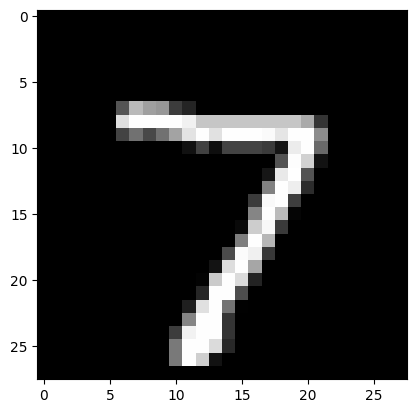

In [22]:
#visual evaluation
import matplotlib.pyplot as plt

model.eval()

data, target = test_data[0]

data = data.unsqueeze(0).to(device) #added batch dimension (pt-->list)

output = model(data)

prediction = output.argmax(dim=1, keepdim=True).item()

print(f'Prediction: {prediction}')

image = data.squeeze(0).squeeze(0).cpu().numpy() #unpack layers

plt.imshow(image, cmap='gray')
plt.show
